In [1]:
from Bio.Seq import Seq

In [23]:
seq1=Seq('ACTGCA')
seq2=Seq('AC')

In [24]:
#method 1
from Bio.SeqUtils import GC

In [25]:
#check GC percentage
GC(seq1)

50.0

In [26]:
#method 2
def gc_content(seq):
    result = float(seq.count('G')+ seq.count('C'))/len(seq) * 100
    return result

In [27]:
gc_content(seq1)

50.0

In [28]:
#method 3
def gc_content2(seq):
    gc_count= [ N for N in seq if N in 'GC']
    result = float(len(gc_count ))/len(seq) * 100
    return result

In [29]:
gc_content2(seq1)

50.0

# Alignment types

In [30]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [31]:
alignments = pairwise2.align.globalxx(seq1,seq2)

In [32]:
print(alignments)

[Alignment(seqA='ACTGCA', seqB='A---C-', score=2.0, start=0, end=6), Alignment(seqA='ACTGCA', seqB='AC----', score=2.0, start=0, end=6)]


In [33]:
print(format_alignment(*alignments[0]))

ACTGCA
|   | 
A---C-
  Score=2



In [34]:
# see all the alignments
for a in alignments:
    print(format_alignment(*a))

ACTGCA
|   | 
A---C-
  Score=2

ACTGCA
||    
AC----
  Score=2



In [35]:
# get only score
alignments2=pairwise2.align.globalxx(seq1,seq2,score_only=True,one_alignment_only=True)

In [36]:
alignments2

2.0

In [37]:
alignments2/len(seq1)

0.3333333333333333

# Hamming Distance

In [38]:
def hamming_distaance(lhs,rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y] )

In [39]:
hamming_distaance(seq1,seq2)

0

In [43]:
hamming_distaance('ACCTA','ACtTA')

1

# Dot plot

In [47]:
def delta(x,y):
    return 0 if x == y else 1
def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))
def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]
def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)
def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2)

In [48]:
dotplot(seq1,seq2)

 |AC
----
A|■ 
C| ■
T|  
G|  
C| ■
A|■ 


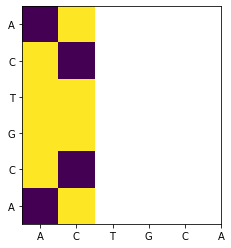

In [52]:
import numpy as np
import matplotlib.pyplot as plt
dotplot=plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

In [56]:
def dotplot(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    xt=plt.xticks(numpy.arange(len(list(seq2))),list(seq2))
    yt=plt.yticks(numpy.arange(len(list(seq1))),list(seq1))
    plt.show()

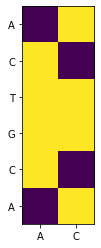

In [57]:
dotplot(seq1,seq2)

In [58]:
from Bio import SeqIO

In [59]:
covid = SeqIO.read('Covid.fasta', 'fasta')
mers = SeqIO.read('MERS.fasta', 'fasta')
sars = SeqIO.read('SARS.fasta', 'fasta')
ebola = SeqIO.read('Ebola.fasta', 'fasta')

In [62]:
#convert or get sequences
covid_seq= covid.seq
sars_seq= sars.seq
mers_seq= mers.seq
ebola_seq= ebola.seq

In [66]:
print(len(covid_seq))
print(len(sars_seq))
print(len(mers_seq))
print(len(ebola_seq))

29903
29751
30119
18959


In [68]:
# check gc content
print("GC of covid_seq: " ,GC(covid_seq))
print("GC of sars_seq: " ,GC(sars_seq))
print("GC of mers_seq: " ,GC(mers_seq))
print("GC of ebola_seq: " ,GC(ebola_seq))

GC of covid_seq:  37.97277865097148
GC of sars_seq:  40.7616550704178
GC of mers_seq:  41.23642883229855
GC of ebola_seq:  41.07284139458832


In [69]:
# translate to protein
covid_protein =covid_seq.translate()
sars_protein= sars_seq.translate()
mers_protein= mers_seq.translate()
ebola_protein= ebola_seq.translate()

C:\Users\mehak\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [70]:
covid_protein

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [71]:
from Bio.SeqUtils import seq3 #seq3 convert amino acids into 3 letter notation

In [72]:
seq3(covid_protein)

'IleLysGlyLeuTyrLeuProArgTerGlnThrAsnGlnLeuSerIleSerCysArgSerValLeuTerThrAsnPheLysIleCysValAlaValThrArgLeuHisAlaTerCysThrHisAlaValTerLeuIleThrAsnTyrCysArgTerGlnAspThrSerAsnSerSerIlePheCysArgLeuLeuThrValSerSerValLeuGlnProIleIleSerThrSerArgPheArgProGlyValThrGluArgTerAspGlyGluProCysProTrpPheGlnArgGluAsnThrArgProThrGlnPheAlaCysPheThrGlySerArgArgAlaArgThrTrpLeuTrpArgLeuArgGlyGlyGlyLeuIleArgGlyThrSerThrSerTerArgTrpHisLeuTrpLeuSerArgSerTerLysArgArgPheAlaSerThrTerThrAlaLeuCysValHisGlnThrPheGlyCysSerAsnCysThrSerTrpSerCysTyrGlyTerAlaGlySerArgThrArgArgHisSerValArgSerTerTrpTerAspThrTrpCysProCysProSerCysGlyArgAsnThrSerGlyLeuProGlnGlySerSerSerTerGluArgTerTerArgSerTrpTrpProTerLeuArgArgArgSerLysValIleTerLeuArgArgArgAlaTrpHisTerSerLeuTerArgPheSerArgLysLeuGluHisTerThrTerGlnTrpCysTyrProTerThrHisAlaTerAlaTerArgArgGlyIleHisSerLeuCysArgTerGlnLeuLeuTrpProTerTrpLeuProSerTerValHisTerArgProSerSerThrCysTrpTerSerPheMetHisPheValArgThrThrGlyLeuTyrTerHisTerGluGlyCysIleLeuLeuProTerThrTerAlaTerAsnCysLeuValHisGlyThrPhe

In [79]:
# check count of amino acids
#mehod 1
from Bio.SeqUtils.ProtParam import ProteinAnalysis
covid_analysed = ProteinAnalysis(str(covid_protein))
sars_analysed = ProteinAnalysis(str(sars_protein))
mers_analysed = ProteinAnalysis(str(mers_protein))
ebola_analysed = ProteinAnalysis(str(ebola_protein))

In [75]:
dir(covid_analysed)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_weight_list',
 'amino_acids_content',
 'amino_acids_percent',
 'aromaticity',
 'charge_at_pH',
 'count_amino_acids',
 'flexibility',
 'get_amino_acids_percent',
 'gravy',
 'instability_index',
 'isoelectric_point',
 'length',
 'molar_extinction_coefficient',
 'molecular_weight',
 'monoisotopic',
 'protein_scale',
 'secondary_structure_fraction',
 'sequence']

In [76]:
covid_analysed.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [82]:
#method 2
from collections import Counter
covid_freq = Counter(covid_protein)
sars_freq = Counter(sars_protein)
mers_freq = Counter(mers_protein)
ebola_freq = Counter(ebola_protein)

In [83]:
covid_freq

Counter({'I': 436,
         'K': 413,
         'G': 394,
         'L': 886,
         'Y': 505,
         'P': 292,
         'R': 558,
         '*': 774,
         'Q': 325,
         'T': 679,
         'N': 472,
         'S': 810,
         'C': 635,
         'V': 548,
         'F': 593,
         'A': 375,
         'H': 332,
         'D': 290,
         'E': 270,
         'W': 263,
         'M': 117})

In [78]:
# most common amino acid
Counter(covid_protein).most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [81]:
sars_analysed.count_amino_acids()

{'A': 575,
 'C': 313,
 'D': 320,
 'E': 365,
 'F': 437,
 'G': 438,
 'H': 298,
 'I': 566,
 'K': 503,
 'L': 1368,
 'M': 365,
 'N': 418,
 'P': 314,
 'Q': 388,
 'R': 417,
 'S': 737,
 'T': 689,
 'V': 683,
 'W': 110,
 'Y': 341}

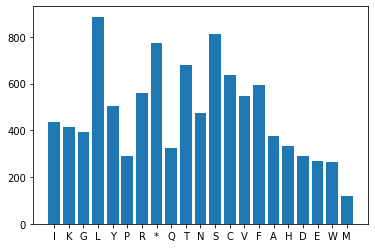

In [86]:
plt.bar(covid_freq.keys(),covid_freq.values());

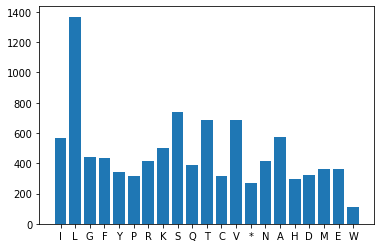

In [87]:
plt.bar(sars_freq.keys(),sars_freq.values());

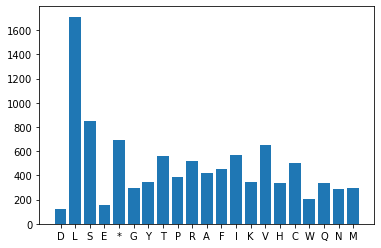

In [88]:
plt.bar(mers_freq.keys(),mers_freq.values());

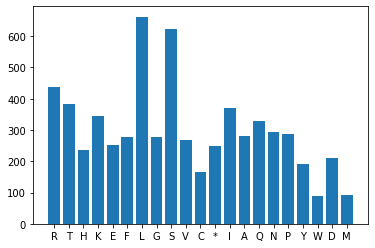

In [89]:
plt.bar(ebola_freq.keys(),ebola_freq.values());

In [91]:
# Check molecular weight
covid_protein
seq2=ProteinAnalysis('IKGLYLPR')
seq2.molecular_weight()

959.1858

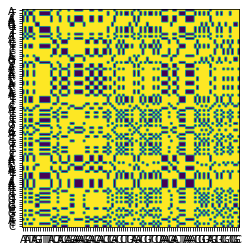

In [93]:
dotplot(covid_seq[0:100],sars_seq[0:100])

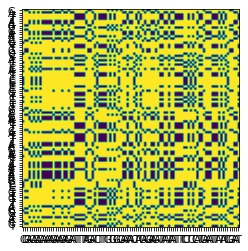

In [94]:
dotplot(mers_seq[0:100],ebola_seq[0:100])

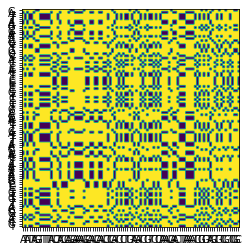

In [95]:
dotplot(mers_seq[0:100],sars_seq[0:100])

In [100]:
# pairwise alignment 
cov_n_sars = pairwise2.align.globalxx(covid_seq[:100],sars_seq[:100],one_alignment_only=True,score_only=True)

In [101]:
cov_n_sars

89.0

In [103]:
cov_n_sars/len(covid_seq[:100])*100

89.0

In [104]:
cov_n_mers = pairwise2.align.globalxx(covid_seq[:100],mers_seq[:100],one_alignment_only=True,score_only=True)

In [105]:
cov_n_mers

71.0

In [106]:
cov_n_ebola = pairwise2.align.globalxx(covid_seq[:100],ebola_seq[:100],one_alignment_only=True,score_only=True)

In [107]:
cov_n_ebola

58.0

In [108]:
print('Covid/Mers: ', cov_n_mers)
print('Covid/Ebola: ', cov_n_ebola)
print('Covid/Sars: ', cov_n_sars)

Covid/Mers:  71.0
Covid/Ebola:  58.0
Covid/Sars:  89.0


# 3D structure

In [109]:
from Bio.PDB import PDBParser, MMCIFParser

In [110]:
parser = PDBParser()

In [111]:
covid_structure =  parser.get_structure('6LU7','6lu7.pdb')
sars_structure =  parser.get_structure('5xes','5xes.pdb')
mers_structure =  parser.get_structure('6pxh','6pxh.pdb')
ebola_structure =  parser.get_structure('6hs4','6hs4.pdb')

C:\Users\mehak\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2811.
  warnings.warn(
C:\Users\mehak\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25792.
  warnings.warn(
C:\Users\mehak\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25872.
  warnings.warn(
C:\Users\mehak\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25961.
  warnings.warn(
C:\Users\mehak\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 25971.
  warnings.warn(
C:\Users\mehak\AppData\Loc

In [112]:
import nglview as nv

In [113]:
view_covid = nv.show_biopython(covid_structure)

In [114]:
view_covid

NGLWidget()

In [118]:
view_mers = nv.show_biopython(mers_structure)

In [119]:
view_sars = nv.show_biopython(sars_structure)

In [120]:
view_ebola = nv.show_biopython(ebola_structure)

In [121]:
view_ebola

NGLWidget()

In [122]:
view_sars

NGLWidget()

In [123]:
view_mers

NGLWidget()

# Sequence links-
Covid19: https://www.ncbi.nlm.nih.gov/nuccore/...
SARS:https://www.ncbi.nlm.nih.gov/nuccore/...
MERS:https://www.ncbi.nlm.nih.gov/nuccore/...  
EBOLA : https://www.ncbi.nlm.nih.gov/nuccore/...

# PDB links- 
https://www.rcsb.org/structure/6HS4
https://www.rcsb.org/structure/6PXH
https://www.rcsb.org/structure/5XES
https://www.rcsb.org/structure/6LU7